# Outlier

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns


In [20]:
df=pd.read_csv(r"C:\Users\suvar\Desktop\Linear Regression\Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [22]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

<AxesSubplot:>

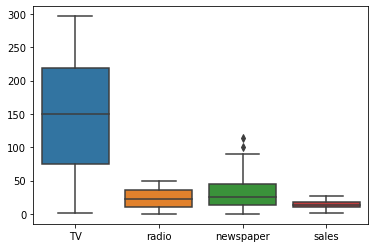

In [23]:
sns.boxplot(data=df)

In [24]:
for col in df.columns:
    percentiles = df[col].quantile([0.01, 0.99]).values
    df[col][df[col] <= percentiles[0]] = percentiles[0]
    df[col][df[col] >= percentiles[1]] = percentiles[1]

<AxesSubplot:>

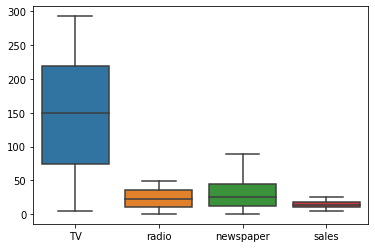

In [6]:
sns.boxplot(data=df)

In [10]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.051499,23.265500,30.377511,14.035499
std,85.767528,14.841134,21.189208,5.142466
min,5.399870,0.399990,0.999990,4.799840
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,292.900070,49.400000,89.401150,25.500070


In [11]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [25]:
p1=df.TV.quantile(0.02)
p1

7.79

In [26]:
p90=df.TV.quantile(0.98)
p90

289.72

In [18]:
df.radio=radio.where(df.radio<p1,p1,
                where(df.radio > p90,p90,df.Radio))

NameError: name 'radio' is not defined

In [7]:
import numpy as np
for col in df.columns:
    percentiles = df[col].quantile([0.01, 0.99]).values
    df[col] = np.clip(df[col], percentiles[0], percentiles[1])

In [27]:
def scale_val(s, val):
    percentiles = s.quantile([0.01,0.99]).values
    if val <= percentiles[0]:
        return percentiles[0]
    elif val >= percentiles[1]:
        return percentiles[1]
    else:
        return val

In [28]:
df.apply(lambda s: s.apply(lambda v: scale_val(s,v)))

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
